In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
## load dataset (digit mnist dataset)

(img_train, label_train), (img_test, label_test) = mnist.load_data()

In [4]:
# preprocess data

img_train = img_train / 255.0
img_test = img_test / 255.0

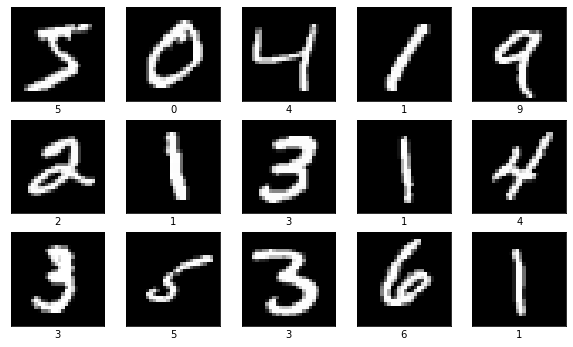

In [5]:
# graphical representation

plt.figure(figsize=(10,10))

for i in range(15):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_train[i], cmap=plt.cm.gray)
  plt.xlabel(str(label_train[i]))

In [6]:
# reshape data
img_train = np.reshape(img_train, (60000, 784))
img_test = np.reshape(img_test, (10000, 784))

In [7]:
# create autoencoder

# input vect
input_vect = Input(shape=(784, ))

#  encoder
encoder = Dense(500, activation='relu') (input_vect)
encoder = BatchNormalization() (encoder)
encoder = Dense(250, activation='relu') (encoder)
encoder = BatchNormalization() (encoder)
encoder = Dense(125, activation='relu') (encoder)
encoder = BatchNormalization() (encoder)

# decoder
decoder = Dense(250, activation='relu') (encoder)
decoder = BatchNormalization() (decoder)
decoder = Dense(500, activation='relu') (decoder)
decoder = BatchNormalization() (decoder)
decoder = Dense(784, activation='sigmoid') (decoder)
decoder = BatchNormalization() (decoder)

# output
autoencoder = Model(input_vect, decoder)

In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
batch_normalization_2 (Batch (None, 250)               1000      
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
batch_normalization_3 (Batch (None, 125)               500 

In [9]:
# compile the model
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# fit the autoencoder (for rebuilding the image)
autoencoder.fit(img_train, img_train, epochs=25, batch_size=256, shuffle=True)

Epoch 1/25
60000/60000 [==============================] - 11s 187us/step - loss: 0.2616
Epoch 2/25
60000/60000 [==============================] - 10s 160us/step - loss: 0.0614
Epoch 3/25
60000/60000 [==============================] - 9s 151us/step - loss: 0.0421
Epoch 4/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0334
Epoch 5/25
60000/60000 [==============================] - 10s 160us/step - loss: 0.0275
Epoch 6/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.0227
Epoch 7/25
60000/60000 [==============================] - 9s 158us/step - loss: 0.0192
Epoch 8/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0164
Epoch 9/25
60000/60000 [==============================] - 10s 162us/step - loss: 0.0141
Epoch 10/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.0131
Epoch 11/25
60000/60000 [==============================] - 9s 158us/step - loss: 0.0115
Epoch 12/25
60000/60000 [==========

In [11]:
result_imgs = autoencoder.predict(img_test)

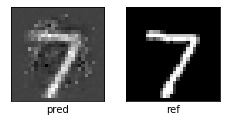

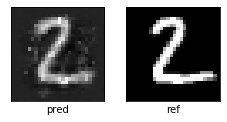

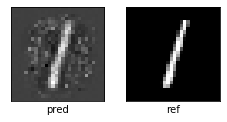

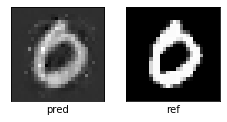

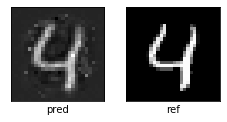

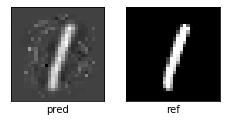

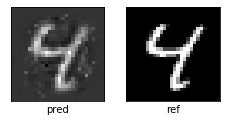

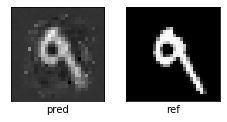

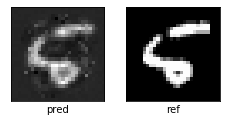

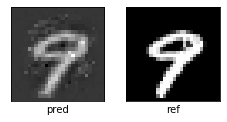

In [12]:
# check if the model is efficient to rebuild the image
for i in range(10):
  plt.figure(figsize=(10,10))

  img = result_imgs[i]
  img_ref = img_test[i]
  img = np.reshape(img, (28, 28))
  img_ref = np.reshape(img_ref, (28, 28))

  plt.subplot(5, 5, 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.gray)
  plt.xlabel("pred")

  plt.subplot(5, 5, 2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_ref, cmap=plt.cm.gray)
  plt.xlabel("ref")

In [13]:
# blur tests images
noise_factor = 0.6

img_test_n = img_test + noise_factor * np.random.normal(loc=0, scale=1.0, size=img_test.shape)
img_train_n = img_train + noise_factor * np.random.normal(loc=0, scale=1.0, size=img_train.shape)

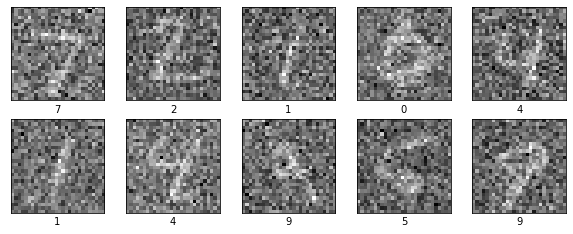

In [14]:
# print noised images

plt.figure(figsize=(10,10))

for i in range(10):
  img = img_test_n[i]
  img = np.reshape(img, (28, 28))

  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.gray)
  plt.xlabel(label_test[i])

In [15]:
# fit the autoencoder for denoising an image

autoencoder.fit(img_train_n, img_train, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0252
Epoch 2/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0220
Epoch 3/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0209
Epoch 4/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0200
Epoch 5/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0194
Epoch 6/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0188
Epoch 7/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0182
Epoch 8/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0175
Epoch 9/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0168
Epoch 10/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0162


In [16]:
# denoise img

denoising_res = autoencoder.predict(img_test_n)

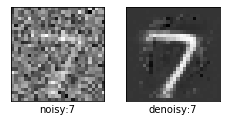

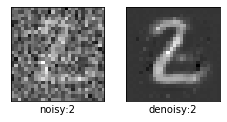

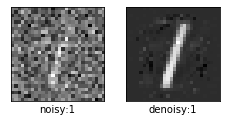

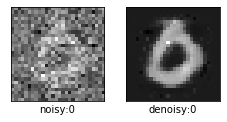

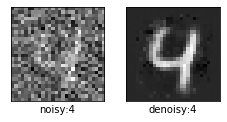

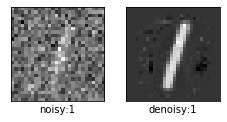

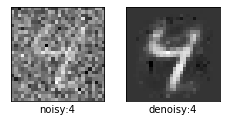

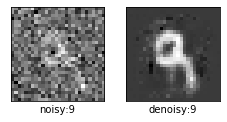

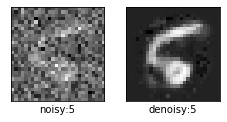

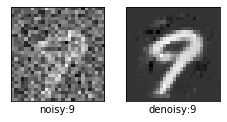

In [17]:
# check if the model is efficient to denoise img
for i in range(10):
  plt.figure(figsize=(10,10))

  denoisy_img = denoising_res[i]
  noisy_img = img_test_n[i]
  denoisy_img = np.reshape(denoisy_img, (28, 28))
  noisy_img = np.reshape(noisy_img, (28, 28))

  plt.subplot(5, 5, 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(noisy_img, cmap=plt.cm.gray)
  plt.xlabel("noisy:{}".format(str(label_test[i])))

  plt.subplot(5, 5, 2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(denoisy_img, cmap=plt.cm.gray)
  plt.xlabel("denoisy:{}".format(str(label_test[i])))